In [5]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

from IPython.html.widgets import interact, fixed
import ipywidgets as widgets

import io 

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               'size': 10,
              }
import sys
import glob #glob is helpful for searching for filenames or directories
sys.path.append('E:\\Differential-Dynamic-Microscopy---Python')
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
import pickle #for saving data

C:\Users\devyn\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "C:\Users\devyn\Anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\Users\devyn\Anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\Users\devyn\Anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\devyn\Anaconda2\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\devyn\Anaconda2\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\devyn\Anaconda2\lib\site-

Begin by initializing a pickle file if you want to save the fit data

In [ ]:
allResults = {} 

Define the framerate, pixel size, and ROI dimension

In [4]:
framerate = 18.0
px = 0.194
imDimension = 256
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*(px))) 
qrange = np.where((q>=0.3)&(q<=3.0)) #this is the q range where the values are typically reasonable!
dts = ddm.genLogDist(1,2998,400)
times = dts/framerate

NameError: name 'ddm' is not defined

Load in the data directory and the data file that you want to analyze

In [7]:
date = '032719'
roi = ['0','256','512','768','1024']
video = ['1', '2','3','4','5','6','7','8','9','10','11']
R = 4
V = 8

data = 'E:\\NewPaper2stuff\\allResults_fromharddrive\\allResults_1-9_040119_None_C.p'
use = pickle.load(open(data,'rb'))

fitparams = use['fitparams_'+video[V]+'_'+roi[R]]
theory = use['theory_'+video[V]+'_'+roi[R]]
ravs = use['ravs_'+video[V]+'_'+roi[R]]

taus = fitparams[:,1]

In [ ]:
for i in range(len(q[:50])):
    fig = plt.figure(figsize=(3,3)); ax = fig.gca();
    ax.semilogx(times,ravs[:,i],'ro',alpha=0.4)
    ax.plot(times[:len(theory[i,:])], theory[i,:], '-b',lw=3)
    

In [ ]:
values = np.array([46,36,23,21])
for j in values:
    taus[j] = np.NAN

allRez['NAN_taus_'+video[V]+'_'+roi[R]] = taus

<IPython.core.display.Javascript object>


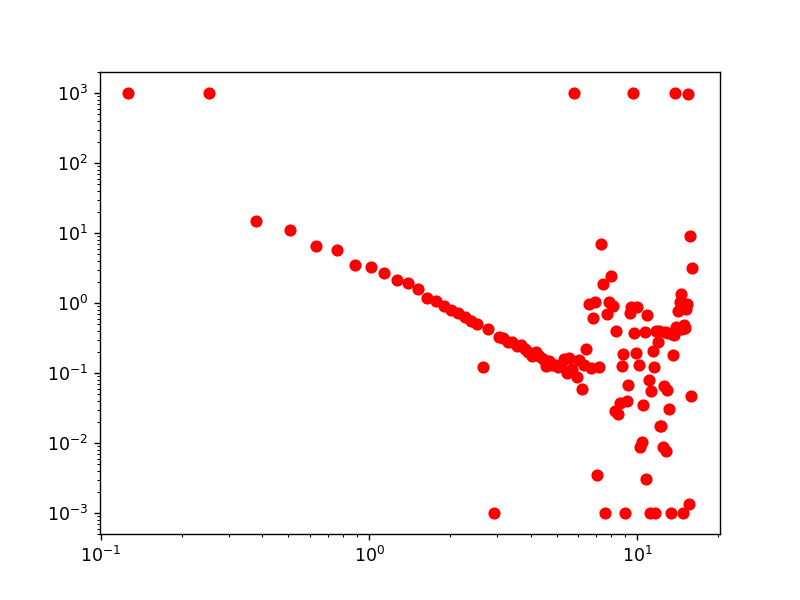

In [18]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(q[:-1], taus, 'ro')
text=ax.text(0,0, "", va="bottom", ha="left")

def onclick(event):
    w = np.where((q==event.q))
    tx = 'button=%d, q=%d, tau=%d, ws=%d' % (event.button, event.q, event.taus, event.w[0])
    text.set_text(tx)
     
cid = fig.canvas.mpl_connect('button_press_event', onclick)

NameError: name 'w' is not defined